In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("Display.max_columns",None)
pd.set_option("Display.max_rows",None)

In [3]:
#importing the data files
df_cust=pd.read_excel("Customers_31JAN2019.xlsx")

    
df_lms = pd.read_excel("LMS_31JAN2019.xlsx")




df_rf=pd.read_excel("RF_Final_Data.xlsx")
df_train=pd.read_csv("train_foreclosure.csv")
df_test=pd.read_csv("test_foreclosure.csv")

In [4]:
#Let's check the top 2 enteries for each dataset
print(df_cust.head())
print(df_lms.head())
print(df_rf.head())
print(df_train.head())
print(df_test.head())

   CUSTOMERID  CUST_CONSTTYPE_ID  CUST_CATEGORYID  PROFESSION   AGE SEX  \
0    12001000                  1                5         NaN  33.0   M   
1    12001001                  1                5         NaN  44.0   M   
2    12001002                  1                7         NaN  50.0   M   
3    12001003                  3                4         NaN  40.0   M   
4    12001004                  3                4         NaN  27.0   M   

  MARITAL_STATUS QUALIFICATION  NO_OF_DEPENDENT  OCCUPATION POSITION  \
0              M      POSTGRAD              0.0         NaN      NaN   
1              M      POSTGRAD              0.0         NaN      NaN   
2              M          GRAD              0.0         NaN      NaN   
3              M          GRAD              0.0         NaN      NaN   
4              M          GRAD              0.0         NaN      NaN   

    GROSS_INCOME  PRE_JOBYEARS  NETTAKEHOMEINCOME  BRANCH_PINCODE  
0  198375.221829           8.0      198375.22182

In [ ]:
# for now, lets do merging excluding rf file, as it requires text analysis


In [5]:
#lets check the shape
print(df_cust.shape)
print(df_lms.shape)
print(df_train.shape)
print(df_test.shape)

(10000, 15)
(624250, 38)
(20012, 2)
(13342, 2)


In [6]:
#Let's understand the df_lms dataset.
#1a. Descriptive statistics
df_lms.describe().T

,count,mean,std,min,25%,50%,75%,max
AGREEMENTID,624250.0,1.123081e+07,7.984211e+03,1.122000e+07,1.122430e+07,1.122894e+07,1.123592e+07,1.125335e+07
CUSTOMERID,623734.0,1.201179e+07,7.961736e+03,1.200100e+07,1.200530e+07,1.200993e+07,1.201690e+07,1.203390e+07
LOAN_AMT,624250.0,5.828204e+06,1.323121e+07,3.753240e+04,1.516309e+06,2.627268e+06,5.209731e+06,5.704924e+08
NET_DISBURSED_AMT,624250.0,5.778192e+06,1.313555e+07,3.753240e+04,1.501296e+06,2.593211e+06,5.166899e+06,5.674589e+08
CURRENT_ROI,624250.0,1.506884e+01,2.506164e+00,-5.056636e+00,1.310980e+01,1.498262e+01,1.716759e+01,3.745656e+01
ORIGNAL_ROI,624250.0,1.499706e+01,2.470942e+00,0.000000e+00,1.310980e+01,1.498262e+01,1.654331e+01,3.414790e+01
CURRENT_TENOR,624245.0,1.784065e+02,4.949071e+01,0.000000e+00,1.500000e+02,1.800000e+02,2.030000e+02,7.130000e+02
ORIGNAL_TENOR,624250.0,1.779103e+02,4.421234e+01,0.000000e+00,1.680000e+02,1.800000e+02,1.800000e+02,3.000000e+02
DUEDAY,624250.0,6.405117e+00,3.533971e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.500000e+01
PRE_EMI_DUEAMT,624250.0,6.221159e+04,3.555793e+05,0.000000e+00,4.975868e+03,1.222875e+04,3.607449e+04,3.177540e+07


In [7]:
Info = pd.DataFrame({
    'Unique_Values' : df_lms.nunique(),
    'data_type' : df_lms.dtypes,
    'isNull' : df_lms.isnull().sum(),
    '%of_null_value':((df_lms.isnull().sum())/(df_lms.isnull().count()))*100
})
Info.sort_values(by=['isNull'],ascending=False)

,Unique_Values,data_type,isNull,%of_null_value
NPA_IN_LAST_MONTH,5,object,610891,97.859992
NPA_IN_CURRENT_MONTH,3,object,610814,97.847657
LAST_RECEIPT_AMOUNT,45060,float64,12045,1.929515
LAST_RECEIPT_DATE,1664,datetime64[ns],3787,0.606648
CUSTOMERID,32895,float64,516,0.082659
SCHEMEID,250,float64,516,0.082659
DPD,452,float64,31,0.004966
CITY,316,object,8,0.001282
CURRENT_TENOR,449,float64,5,0.000801
BALANCE_TENURE,541,float64,5,0.000801


In [8]:
Info = pd.DataFrame({
    'Unique_Values' : df_cust.nunique(),
    'data_type' : df_cust.dtypes,
    'isNull' : df_cust.isnull().sum(),
    '%of_null_value':((df_cust.isnull().sum())/(df_cust.isnull().count()))*100
})
Info.sort_values(by=['isNull'],ascending=False)

,Unique_Values,data_type,isNull,%of_null_value
PROFESSION,0,float64,10000,100.00
OCCUPATION,0,float64,10000,100.00
POSITION,32,object,9339,93.39
PRE_JOBYEARS,37,float64,7625,76.25
QUALIFICATION,8,object,603,6.03
AGE,59,float64,396,3.96
MARITAL_STATUS,2,object,396,3.96
SEX,2,object,394,3.94
NO_OF_DEPENDENT,9,float64,79,0.79
BRANCH_PINCODE,49,float64,73,0.73


In [12]:
df_lms.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.45880,29042.4588,0.00000,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.00000,0.0000,0.00000,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,2.439242e+06,2.439242e+06,0.000000,0.44171,0.0000,0.44171,-0.441710,3.944954e+06,1.085444e+05,1.549566e+06,3.944954e+06,2013-11-05,30898.0,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,2010-09-29,MUMBAI,28441.732656,28441.732656,0.0,7.211965e+06,7.211965e+06,0.000000,0.00000,0.0000,0.00000,0.000000,1.030278e+07,2.954253e+06,4.219464e+06,1.255472e+07,2013-11-05,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,7.712034e+06,7.712034e+06,0.000000,0.00000,0.0000,0.00000,0.000000,8.479158e+06,4.732245e+06,3.812974e+06,1.178201e+07,2013-11-05,91892.0,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [ ]:
#checking those datav points where loan amount is not equal to net disbursed amount

In [13]:
ln= df_lms[(df_lms['LOAN_AMT']) != (df_lms['NET_DISBURSED_AMT'])]

In [14]:
ln.head(10)

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
201,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,46.0,120,15,2011-10-31,MUMBAI,2.686858e+05,2.686858e+05,0.00000,1.794514e+07,1.794514e+07,0.000000,0.000000,0.000000,0.000000,0.000000,9.756660e+06,3.241286e+07,6.074061e+06,3.586247e+07,2013-11-15,338554.0,73.26,24,22.0,0.0,0.72,LAP,10901121.0,NaN,NaN,25
224,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.734072,12.797658,308.0,300,1,2011-08-19,DELHI,2.748150e+05,2.748150e+05,0.00000,1.606591e+06,1.481139e+06,125452.379256,1.060105,0.000000,1.060105,125451.319151,8.904018e+06,1.024615e+05,1.091174e+06,8.904018e+06,2013-11-01,56803.0,80.00,16,292.0,0.0,0.60,HL,10901160.0,NaN,NaN,27
433,11220434,12001433.0,1.501296e+07,9.419980e+06,2011-12-02,13.734072,13.421934,240.0,240,1,2011-12-02,MUMBAI,1.949303e+06,1.822267e+06,127035.91104,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,127035.911040,9.419980e+06,0.000000e+00,1.238713e+06,9.419980e+06,2013-11-01,57520.0,55.38,0,240.0,0.0,0.60,HL,10901160.0,NaN,NaN,23
694,11220695,12001694.0,1.324374e+07,1.124925e+07,2012-02-21,14.982624,14.046210,240.0,240,15,2012-02-21,MUMBAI,2.422746e+06,2.422746e+06,0.00000,0.000000e+00,0.000000e+00,0.000000,35849.812373,35849.216064,0.596309,-0.596309,1.124925e+07,0.000000e+00,1.665642e+06,1.124925e+07,2013-11-15,74934.0,69.70,0,240.0,0.0,0.97,HL,10901148.0,NaN,NaN,21
858,11220859,12001858.0,2.751144e+06,1.804874e+06,2012-03-31,14.358348,13.421934,60.0,60,15,2012-03-31,PUNE,4.671507e+05,4.671507e+05,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.804874e+06,0.000000e+00,3.175526e+05,1.804874e+06,2013-11-15,11522.0,60.71,0,60.0,0.0,0.30,HL,10901148.0,NaN,NaN,20
915,11220916,12001915.0,1.876620e+06,1.550621e+06,2012-04-26,13.734072,13.421934,180.0,180,1,2012-04-26,MUMBAI,3.132632e+05,2.923482e+05,20914.98744,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,20914.987440,1.550621e+06,0.000000e+00,1.987280e+05,1.550621e+06,2013-11-01,9470.0,17.97,0,180.0,0.0,0.60,HL,10901160.0,NaN,NaN,19
1672,11221673,12002672.0,3.075907e+06,3.030869e+06,2013-05-02,17.167590,16.231176,205.0,180,5,2013-05-02,MUMBAI,4.832312e+03,4.832312e+03,0.00000,3.384915e+05,3.384915e+05,0.000000,0.000000,0.000000,0.000000,0.000000,2.999005e+06,3.186350e+04,2.015159e+05,2.999005e+06,2013-11-05,25544.0,56.63,6,199.0,0.0,0.67,LAP,10901103.0,NaN,NaN,6
1689,11221690,12002689.0,2.552203e+07,1.965985e+07,2013-01-31,14.046210,13.109796,192.0,192,5,2013-01-31,MUMBAI,1.759308e+06,1.759308e+06,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.965985e+07,0.000000e+00,1.195916e+06,1.965985e+07,2013-11-05,107768.0,78.61,0,192.0,0.0,0.57,HL,10901148.0,NaN,NaN,10
1796,11221797,12002796.0,8.879794e+06,6.888356e+06,2013-03-31,15.606900,14.670486,180.0,180,5,2013-03-31,THANE,7.237712e+05,7.237712e+05,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,6.888356e+06,0.000000e+00,4.919942e+05,6.888356e+06,2013-11-05,47795.0,34.23,0,180.0,0.0,0.61,HL,10901148.0,NaN,NaN,8
1810,11221811,12002810.0,9.238510e+06,9.193472e+06,2013-05-06,14.982624,14.046210,301.0,240,5,2013-05-06,MUMBAI,0.000000e+00,0.000000e+00,0.00000,8.514498e+05,8.514498e+05,0.000000,0.000000,0.000000,0.000000,0.000000,9.133831e+06,5.964048e+04,5.191451e+05,9.133831e+06,2013-11-05,64254.0,27.29,6,295.0,0.0,1.21,HL,10901104.0,NaN,NaN,6


In [15]:
ln.shape

(23282, 38)

In [16]:
ln.AGREEMENTID.nunique()

5150

In [17]:
#we can see for  5150 agreement ids the net disbursed and loan amount are not equal


In [25]:
df_lms[(df_lms['LOAN_AMT']) < (df_lms['NET_DISBURSED_AMT'])].head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
201,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.16759,15.919038,46.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.794514e+07,1.794514e+07,0.0,0.0,0.0,0.0,0.0,9.756660e+06,3.241286e+07,6.074061e+06,3.586247e+07,2013-11-15,338554.0,73.26,24,22.0,0.0,0.72,LAP,10901121.0,NaN,NaN,25
1877,11221878,12002877.0,5.421633e+06,5.421633e+06,2013-03-31,17.16759,16.231176,205.0,180,5,2013-03-31,DELHI,64900.509072,64900.509072,0.0,6.054789e+05,6.054789e+05,0.0,0.0,0.0,0.0,0.0,5.364641e+06,5.699122e+04,3.987079e+05,5.364641e+06,2013-11-05,45692.0,38.01,6,199.0,0.0,0.80,LAP,10901113.0,NaN,NaN,8
3046,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.16759,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.869285e+07,1.869285e+07,0.0,12147036.0,12147036.0,0.0,0.0,1.065214e+06,4.110431e+07,6.148012e+06,3.542815e+07,2013-12-15,338554.0,73.26,25,12.0,0.0,0.72,LAP,10901121.0,NaN,NaN,26
4686,11221878,12002877.0,5.421633e+06,5.421633e+06,2013-03-31,17.16759,16.231176,205.0,180,5,2013-03-31,DELHI,64900.509072,64900.509072,0.0,7.063921e+05,7.063921e+05,0.0,0.0,0.0,0.0,0.0,5.357515e+06,6.411787e+04,4.601785e+05,5.357515e+06,2013-12-05,45692.0,38.01,7,198.0,0.0,0.80,LAP,10901113.0,NaN,NaN,9
6009,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.16759,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.883337e+07,1.883337e+07,0.0,12147036.0,12147036.0,0.0,0.0,9.819030e+05,4.118762e+07,6.160219e+06,3.534484e+07,2014-01-15,63624.0,73.26,26,11.0,0.0,0.72,LAP,10901121.0,NaN,NaN,27


In [23]:
df_lms[(df_lms['LOAN_AMT']) > (df_lms['NET_DISBURSED_AMT'])].head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
224,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.734072,12.797658,308.0,300,1,2011-08-19,DELHI,2.748150e+05,2.748150e+05,0.00000,1.606591e+06,1.481139e+06,125452.379256,1.060105,0.000000,1.060105,125451.319151,8.904018e+06,102461.486665,1.091174e+06,8.904018e+06,2013-11-01,56803.0,80.00,16,292.0,0.0,0.60,HL,10901160.0,NaN,NaN,27
433,11220434,12001433.0,1.501296e+07,9.419980e+06,2011-12-02,13.734072,13.421934,240.0,240,1,2011-12-02,MUMBAI,1.949303e+06,1.822267e+06,127035.91104,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,127035.911040,9.419980e+06,0.000000,1.238713e+06,9.419980e+06,2013-11-01,57520.0,55.38,0,240.0,0.0,0.60,HL,10901160.0,NaN,NaN,23
694,11220695,12001694.0,1.324374e+07,1.124925e+07,2012-02-21,14.982624,14.046210,240.0,240,15,2012-02-21,MUMBAI,2.422746e+06,2.422746e+06,0.00000,0.000000e+00,0.000000e+00,0.000000,35849.812373,35849.216064,0.596309,-0.596309,1.124925e+07,0.000000,1.665642e+06,1.124925e+07,2013-11-15,74934.0,69.70,0,240.0,0.0,0.97,HL,10901148.0,NaN,NaN,21
858,11220859,12001858.0,2.751144e+06,1.804874e+06,2012-03-31,14.358348,13.421934,60.0,60,15,2012-03-31,PUNE,4.671507e+05,4.671507e+05,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.804874e+06,0.000000,3.175526e+05,1.804874e+06,2013-11-15,11522.0,60.71,0,60.0,0.0,0.30,HL,10901148.0,NaN,NaN,20
915,11220916,12001915.0,1.876620e+06,1.550621e+06,2012-04-26,13.734072,13.421934,180.0,180,1,2012-04-26,MUMBAI,3.132632e+05,2.923482e+05,20914.98744,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,20914.987440,1.550621e+06,0.000000,1.987280e+05,1.550621e+06,2013-11-01,9470.0,17.97,0,180.0,0.0,0.60,HL,10901160.0,NaN,NaN,19


# 3 cases
#### net disbursed != loan amount (23282)= 23248+34
#### net disbursed > loan amount (23248) (adding tax or other charges into asked loan, so net released loan(disbursed) will be greater)

eg-For instance, on basis of your profile, you may be eligible for a home loan of 40 lakh and may get a sanction letter for the same. Based on this, you may want to finalize a house that costs 50 lakh. But the bank’s evaluation finds the property value to be worth 45 lakh and it is ready to disburse only up to 36 lakh (80% of 45 lakh i.e loan-to-value ratio), even though it sanctioned a loan of 40 lakh. Such instances are more common when you buy a property from the resale market, and so it is better to be prepared for such circumstances.

#### net disbursed < loan amount (34 cases)


2nd scenario might be

lets say loan amountis 3 lakhs and net disbursed is 2.9 lakhs 

Bank disburses loan amount basis :-

Gross Loan Amount - Processing Fees - Stamp Duty - Advance EMI = Net Disbursement Amount

Here,

Rs. 3 Lakh = Gross Loan Amount

Rs. 3000 (approx) = Presuming as Processing Fees

Rs. 7000 (approx) = Presuming as approx EMI

So - you going with 60 EMI with 1 advance then your disbursement amount will be Rs. 2.9 Lakh. Above scheme presumes that you are paying 1 EMI in advance to bank and this emi bank adjusts from disbursement

#### majority case are bith equal.

for a single agreement id, loan amount will be same but net disbursed amount can vary.

#### Loan amount  is your gross loan amount
###net disbursed amount is your net loan amount that will disburse to your account.(gross amount minus the origination fee)

In [27]:
df_lms[df_lms['AGREEMENTID']==11220225].sort_values(by=['LAST_RECEIPT_DATE'])

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
9125,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,1971-08-20,DELHI,274815.028345,274815.028345,0.0,1.857496e+06,1.857496e+06,0.000000,1.060105,0.000000,1.060105,-1.060105,8.884998e+06,121481.403156,1.327988e+06,8.884998e+06,1974-02-02,56803.0,80.0,18,290.0,0.0,0.6,HL,10901160.0,NaN,NaN,30
224,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.734072,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,1.606591e+06,1.481139e+06,125452.379256,1.060105,0.000000,1.060105,125451.319151,8.904018e+06,102461.486665,1.091174e+06,8.904018e+06,2013-11-01,56803.0,80.0,16,292.0,0.0,0.6,HL,10901160.0,NaN,NaN,27
3069,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.734072,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,1.732044e+06,1.606591e+06,125452.379256,1.060105,0.000000,1.060105,125451.319151,8.897353e+06,109125.738722,1.169788e+06,8.897353e+06,2013-12-01,56803.0,80.0,17,291.0,0.0,0.6,HL,10901160.0,NaN,NaN,28
6029,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,1.857496e+06,1.732044e+06,125452.379256,1.060105,0.000000,1.060105,125451.319151,8.890631e+06,115848.541314,1.248343e+06,8.890631e+06,2014-01-01,56803.0,80.0,18,290.0,0.0,0.6,HL,10901160.0,NaN,NaN,29
12381,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,2.108401e+06,1.982948e+06,125452.379256,125453.439361,125452.379256,1.060105,125451.319151,8.879315e+06,127163.807759,1.407584e+06,8.879315e+06,2014-03-01,56803.0,80.0,20,288.0,0.0,0.6,HL,10901160.0,NaN,NaN,31
15713,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,2.233853e+06,2.108401e+06,125452.379256,125453.439361,125452.379256,1.060105,125451.319151,8.873582e+06,132897.256419,1.487129e+06,8.873582e+06,2014-04-01,56803.0,80.0,21,287.0,0.0,0.6,HL,10901160.0,NaN,NaN,32
19110,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,2.359306e+06,2.233853e+06,125452.379256,346308.639361,346307.579256,1.060105,125451.319151,8.717668e+06,288811.329136,1.566622e+06,8.867797e+06,2014-05-07,100000.0,80.0,22,286.0,0.0,0.6,HL,10901160.0,NaN,NaN,33
22788,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,2.484758e+06,2.359306e+06,125452.379256,346308.639361,346307.579256,1.060105,125451.319151,8.710756e+06,295723.294999,1.644989e+06,8.860885e+06,2014-06-01,56803.0,80.0,23,285.0,0.0,0.6,HL,10901160.0,NaN,NaN,34
26656,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,2.610210e+06,2.484758e+06,125452.379256,346308.639361,346307.579256,1.060105,125451.319151,8.703512e+06,302967.047234,1.723023e+06,8.853642e+06,2014-07-01,56803.0,80.0,24,284.0,0.0,0.6,HL,10901160.0,NaN,NaN,35
30543,11220225,12001224.0,1.015476e+07,9.006479e+06,2011-08-19,13.421934,12.797658,308.0,300,1,2011-08-19,DELHI,274815.028345,274815.028345,0.0,2.735663e+06,2.610210e+06,125452.379256,346308.639361,346307.579256,1.060105,125451.319151,8.696204e+06,310275.355189,1.800993e+06,8.846333e+06,2014-08-01,56803.0,80.0,25,283.0,0.0,0.6,HL,10901160

In [34]:
a=df_lms[df_lms['AGREEMENTID']==11220202].sort_values(by=['LAST_RECEIPT_DATE'])
a
#completed tenure will also get sorted. we sorted on date instead of completed tenure as for some of the cases the value is 0.

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
9105,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,37.0,120,15,1971-11-01,MUMBAI,268685.810664,268685.810664,0.0,1.897389e+07,1.897389e+07,0.0,12147036.0,12147036.0,0.0,0.0,8.976368e+05,4.127189e+07,6.171471e+06,3.526057e+07,1974-02-16,63624.0,73.26,27,10.0,0.0,0.72,LAP,10901121.0,NaN,NaN,28
201,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,46.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.794514e+07,1.794514e+07,0.0,0.0,0.0,0.0,0.0,9.756660e+06,3.241286e+07,6.074061e+06,3.586247e+07,2013-11-15,338554.0,73.26,24,22.0,0.0,0.72,LAP,10901121.0,NaN,NaN,25
3046,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.869285e+07,1.869285e+07,0.0,12147036.0,12147036.0,0.0,0.0,1.065214e+06,4.110431e+07,6.148012e+06,3.542815e+07,2013-12-15,338554.0,73.26,25,12.0,0.0,0.72,LAP,10901121.0,NaN,NaN,26
6009,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.883337e+07,1.883337e+07,0.0,12147036.0,12147036.0,0.0,0.0,9.819030e+05,4.118762e+07,6.160219e+06,3.534484e+07,2014-01-15,63624.0,73.26,26,11.0,0.0,0.72,LAP,10901121.0,NaN,NaN,27
12361,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.911440e+07,1.911440e+07,0.0,12147036.0,12147036.0,0.0,0.0,8.124052e+05,4.135712e+07,6.181758e+06,3.517534e+07,2014-03-15,63624.0,73.26,28,9.0,0.0,0.72,LAP,10901121.0,NaN,NaN,29
15695,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,17.167590,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.925492e+07,1.925492e+07,0.0,12147036.0,12147036.0,0.0,0.0,7.261963e+05,4.144333e+07,6.191068e+06,3.508913e+07,2014-04-15,63624.0,73.26,29,8.0,0.0,0.72,LAP,10901121.0,NaN,NaN,30
19093,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,16.855452,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.939544e+07,1.939544e+07,0.0,12147036.0,12147036.0,0.0,0.0,6.389995e+05,4.153052e+07,6.199389e+06,3.500193e+07,2014-05-15,63624.0,73.26,30,7.0,0.0,0.72,LAP,10901121.0,NaN,NaN,31
22771,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,16.855452,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.953595e+07,1.953595e+07,0.0,12147036.0,12147036.0,0.0,0.0,5.506708e+05,4.161885e+07,6.206579e+06,3.491361e+07,2014-06-15,63624.0,73.26,31,6.0,0.0,0.72,LAP,10901121.0,NaN,NaN,32
26640,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,16.855452,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.967647e+07,1.967647e+07,0.0,12147036.0,12147036.0,0.0,0.0,4.613482e+05,4.170817e+07,6.212775e+06,3.482428e+07,2014-07-15,63624.0,73.26,32,5.0,0.0,0.72,LAP,10901121.0,NaN,NaN,33
30526,11220202,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,16.855452,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,1.981699e+07,1.981699e+07,0.0,12147036.0,12147036.0,0.0,0.0,3.710212e+05,4.179850e+07,6.217966e+06,3.473396e+07,2014-08-15,63624.0,73.26,33,4.0,0.0,0.72,LAP,10901121.0,NaN,NaN,34


In [36]:
a['PAID_PRINCIPAL'].sum()

531380855.9998121

In [41]:
b=a['EMI_RECEIVED_AMT'].sum()
b

251533489.09535998

In [43]:
a['NET_DISBURSED_AMT'].unique()

array([49959370.98450001])

In [48]:
c=a['LOAN_AMT'].unique()
c

array([42169522.40225])

In [49]:
c*13

array([5.48203791e+08])

In [50]:
d=a['PRE_EMI_RECEIVED_AMT'].sum()
d

3492915.538632

In [51]:
d*13

45407902.002216

In [29]:
df_lms['LOAN_AMT'].max()

570492404.0

In [30]:
df_lms['LOAN_AMT'].min()

37532.395000000004

In [32]:
df_lms.groupby(by=['PRODUCT'])['LOAN_AMT'].max().reset_index().sort_values(by=['LOAN_AMT'],ascending=False)

,PRODUCT,LOAN_AMT
1,LAP,5.704924e+08
0,HL,1.531322e+08
2,STHL,1.171011e+07
3,STLAP,7.872123e+06


In [33]:
df_lms.groupby(by=['PRODUCT'])['LOAN_AMT'].min().reset_index().sort_values(by=['LOAN_AMT'],ascending=False)

,PRODUCT,LOAN_AMT
1,LAP,150129.580000
2,STHL,127610.143000
3,STLAP,76467.000277
0,HL,37532.395000


#### LAP

Loan against property is nothing but a loan which you avail by keeping your commercial/residential property as a collateral. Another name for Loan against property is a secured loan

#### HL

A home loan is an amount of money that an individual borrows from a bank or money lending company at a certain rate of interest to be paid with the EMI every month. The property is taken as a security by the money lending company for the Home Loan

#### STHL


#### STLAP

In [52]:
#lets merge the file


In [54]:
#sorting the df_lms data by last reciept date
df_lms=df_lms.sort_values(by=['LAST_RECEIPT_DATE'])

In [56]:
# Merging train and test on aggregated LMS on AGREEMENTID 
# Only last record has been kept in aggregation after sorting by last reciept date
agg_lms = df_lms.groupby(by=['AGREEMENTID']).agg('last').reset_index()
train_1 = pd.merge(df_train, agg_lms, on = 'AGREEMENTID')
test_1 = pd.merge(df_test, agg_lms, on = 'AGREEMENTID')

In [57]:
print(agg_lms.shape)
print(train_1.shape)
print(test_1.shape)

(33354, 38)
(20012, 39)
(13342, 39)


In [61]:
#merge with df_cust, left so as to include null customer id
train = pd.merge(train_1, df_cust, on = 'CUSTOMERID', how = 'left')
test = pd.merge(test_1, df_cust, on = 'CUSTOMERID', how = 'left')

In [62]:
print(train.shape)
print(test.shape)

(20012, 53)
(13342, 53)


In [64]:
#Lets do analysis on data

In [66]:
train.CUSTOMERID.isnull().sum()

281

In [67]:
test.CUSTOMERID.isnull().sum()

178

In [68]:
train.to_csv('merge_train.csv', index = False)
test.to_csv('merge_test.csv', index = False)

In [76]:
#first concat train and test to one file
df=pd.concat(['train','test'])

In [71]:
df=pd.read_csv("final_data.csv")

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (36,37,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df.head()

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,11220001,1.0,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,45.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.614898e+06,8.439420e+06,175477.782641,2.135869e+05,2.135869e+05,0.0,175477.782641,1.164472e+05,1.159366e+07,2.725723e+06,8.693575e+06,2014-05-05,1000000.0,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45,1.0,5.0,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,11220002,1.0,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000e+00,0.000000e+00,0.0,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38,1.0,5.0,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,11220006,1.0,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,15.606900,11.549106,312.0,180,5,2010-11-02,MUMBAI,5947.630536,5947.630536,0.0,4.670211e+06,4.670211e+06,0.000000,1.179716e+06,1.179716e+06,0.0,0.000000,2.994184e+06,9.392115e+05,2.990124e+06,3.744831e+06,2017-08-05,22878.0,50.89,81,231.0,0.0,0.72,HL,10901101.0,NaN,NaN,81,3.0,4.0,NaN,43.0,M,M,GRAD,0.0,NaN,NaN,53536.208228,NaN,53536.208228,400070.0
3,11220008,1.0,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,11.236968,10.612692,91.0,180,1,2010-10-06,THANE,60322.180776,60322.180776,0.0,1.313098e+07,1.306732e+07,63659.280762,6.770848e+06,6.770848e+06,0.0,63659.280762,4.295120e+04,9.979637e+06,4.648994e+06,5.747875e+06,2018-05-02,65741.0,84.63,91,0.0,0.0,0.60,HL,10901100.0,0,0,91,1.0,5.0,NaN,33.0,M,M,POSTGRAD,0.0,NaN,AVP,123370.483661,7.0,123370.483661,400070.0
4,11220010,1.0,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,14.982624,10.924830,304.0,180,5,2010-10-26,MUMBAI,27732.787464,27732.787464,0.0,1.048923e+07,1.048923e+07,0.000000,1.202181e+05,1.202181e+05,0.0,0.000000,7.200653e+06,5.552847e+05,6.593778e+06,7.200653e+06,2018-04-05,54433.0,30.94,89,215.0,0.0,0.83,HL,10901101.0,0,0,90,3.0,4.0,NaN,37.0,M,M,UG,0.0,NaN,NaN,93803.844072,NaN,93803.839568,400070.0


In [73]:
df[df['AGREEMENTID']==11220202]

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
20090,11220202,NaN,12001201.0,4.216952e+07,4.995937e+07,2011-10-31,16.855452,15.919038,37.0,120,15,2011-10-31,MUMBAI,268685.810664,268685.810664,0.0,2.023854e+07,2.023854e+07,0.0,12147036.0,12147036.0,0.0,0.0,93895.543219,4.207563e+07,6.227396e+06,3.445683e+07,2014-11-15,63624.0,73.26,36,1.0,0.0,0.72,LAP,10901121.0,NaN,NaN,37,1.0,4.0,NaN,54.0,M,M,UG,0.0,NaN,NaN,923520.610074,NaN,0.0,400070.0


In [77]:
unique_agreementid=pd.DataFrame({'datafile':['df_lms','df_train','df_test','df'],
                   'unique agreement id':[df_lms.AGREEMENTID.nunique(),df_train.AGREEMENTID.nunique(),df_test.AGREEMENTID.nunique(),df.AGREEMENTID.nunique()]})



,datafile,unique agreement id
0,df_lms,33354
1,df_train,20012
2,df_test,13342
3,df,33354


# Descriptive statistics
## Features present in the dataset

In [87]:
pd.DataFrame(df.columns)

,0
0,AGREEMENTID
1,FORECLOSURE
2,CUSTOMERID
3,LOAN_AMT
4,NET_DISBURSED_AMT
5,INTEREST_START_DATE
6,CURRENT_ROI
7,ORIGNAL_ROI
8,CURRENT_TENOR
9,ORIGNAL_TENOR


# After merging, final columns are 53

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGREEMENTID,33354.0,1.123668e+07,9.628615e+03,1.122000e+07,1.122834e+07,1.123668e+07,1.124502e+07,1.125335e+07
FORECLOSURE,20012.0,8.969618e-02,2.857531e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
CUSTOMERID,32895.0,1.201745e+07,9.496138e+03,1.200100e+07,1.200922e+07,1.201745e+07,1.202567e+07,1.203390e+07
LOAN_AMT,33354.0,5.843930e+06,1.316229e+07,3.753239e+04,1.546335e+06,2.664688e+06,5.179471e+06,5.674589e+08
NET_DISBURSED_AMT,33354.0,5.735300e+06,1.283593e+07,3.753239e+04,1.532814e+06,2.619761e+06,5.098352e+06,5.674589e+08
CURRENT_ROI,33354.0,1.468632e+01,2.510205e+00,9.901017e+00,1.248552e+01,1.435835e+01,1.623118e+01,2.996525e+01
ORIGNAL_ROI,33354.0,1.439668e+01,2.596529e+00,9.651307e+00,1.248552e+01,1.373407e+01,1.616875e+01,2.996525e+01
CURRENT_TENOR,33354.0,1.880177e+02,5.694889e+01,6.000000e+00,1.670000e+02,1.800000e+02,2.280000e+02,7.130000e+02
ORIGNAL_TENOR,33354.0,1.833871e+02,4.463828e+01,1.400000e+01,1.800000e+02,1.800000e+02,2.280000e+02,3.000000e+02
DUEDAY,33354.0,5.760508e+00,2.698231e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.500000e+01


In [6]:
def missing_values(data_name):
    missing=data_name.isnull().sum().sort_values(ascending=False)
    total=((data_name.isnull().sum()/data_name.isnull().count())*100).sort_values(ascending=False)
    d=pd.concat([missing,total],axis=1,keys=['values','percentage'])
    return(d)

In [91]:
missing_values(df)

,values,percentage
PROFESSION,33354,100.000000
OCCUPATION,33354,100.000000
POSITION,32693,98.018229
PRE_JOBYEARS,30979,92.879415
QUALIFICATION,23957,71.826468
MARITAL_STATUS,23750,71.205852
AGE,23750,71.205852
SEX,23748,71.199856
NO_OF_DEPENDENT,23433,70.255442
BRANCH_PINCODE,23427,70.237453


In [93]:
df.drop(['PROFESSION','OCCUPATION','POSITION','PRE_JOBYEARS'],axis=1,inplace=True)

In [99]:
Info = pd.DataFrame({
    'Unique_Values' : df.nunique(),
    'data_type' : df.dtypes,
    'skewness': df.skew(),
    'Kurtosis': df.kurt(),
    'isNull' : df.isnull().sum(),
    '%of_null_value':((df.isnull().sum())/(df.isnull().count()))*100
})

In [102]:
Info=Info.sort_values(by=['isNull'],ascending=False)
Info

,Unique_Values,data_type,skewness,Kurtosis,isNull,%of_null_value
QUALIFICATION,8,object,NaN,NaN,23957,71.826468
AGE,59,float64,3.061363e-01,-0.511919,23750,71.205852
MARITAL_STATUS,2,object,NaN,NaN,23750,71.205852
SEX,2,object,NaN,NaN,23748,71.199856
NO_OF_DEPENDENT,9,float64,2.196698e+00,5.041647,23433,70.255442
BRANCH_PINCODE,49,float64,-1.138703e+00,1.389083,23427,70.237453
GROSS_INCOME,7073,float64,2.776723e+01,1033.071886,23354,70.018588
NETTAKEHOMEINCOME,7036,float64,2.781992e+01,1035.887909,23354,70.018588
CUST_CATEGORYID,5,float64,2.544456e+00,7.766111,23354,70.018588
CUST_CONSTTYPE_ID,6,float64,5.465878e+00,30.689043,23354,70.018588


In [103]:
df['LAST_RECEIPT_DATE'] = pd.to_datetime(df['LAST_RECEIPT_DATE'])
df['INTEREST_START_DATE'] = pd.to_datetime(df['INTEREST_START_DATE'])
df['AUTHORIZATIONDATE'] = pd.to_datetime(df['AUTHORIZATIONDATE'])
df['FORECLOSURE']=df['FORECLOSURE'].astype(object)
df['AGREEMENTID']=df['AGREEMENTID'].astype(object)
df['CUSTOMERID']=df['CUSTOMERID'].astype(object)
df['CUST_CATEGORYID']=df['CUST_CATEGORYID'].astype(object)
df['CUST_CONSTTYPE_ID']=df['CUST_CONSTTYPE_ID'].astype(object)
df['FORECLOSURE']=df['FORECLOSURE'].astype(object)

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("final_data_k.csv")

In [4]:
df.head()

,AGREEMENTID,FORECLOSURE,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,...,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,CUST_CONSTTYPE_ID,AGE,SEX,MARITAL_STATUS,NO_OF_DEPENDENT,GROSS_INCOME,DAYS_TILL_LAST_RECEIPT,FIXED_OBLIGATIONS
0,11220001,1.0,1.171011e+07,1.171011e+07,13.421934,10.612692,45.0,120,1,7994.273589,...,No,No,1.0,33.0,M,M,0.0,198375.221829,1345,3967.504437
1,11220002,1.0,1.929025e+07,1.929025e+07,13.734072,10.612692,137.0,180,1,100504.575864,...,No,No,1.0,44.0,M,M,0.0,242703.982915,1143,4854.079658
2,11220006,1.0,3.933395e+06,3.933395e+06,16.231176,11.549106,358.0,180,5,5947.630536,...,No,No,3.0,43.0,M,M,0.0,53536.208228,1737,1284.868997
3,11220008,1.0,1.002259e+07,1.002259e+07,13.421934,10.612692,91.0,180,1,60322.180776,...,No,No,1.0,33.0,M,M,0.0,123370.483661,1760,2467.409673
4,11220010,1.0,7.755937e+06,7.755937e+06,15.606900,10.924830,341.0,180,5,27732.787464,...,No,No,3.0,37.0,M,M,0.0,93803.844072,1744,2595.239686


In [5]:
df.columns

Index(['AGREEMENTID', 'FORECLOSURE', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR',
       'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE',
       'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'CUST_CONSTTYPE_ID', 'AGE', 'SEX',
       'MARITAL_STATUS', 'NO_OF_DEPENDENT', 'GROSS_INCOME',
       'DAYS_TILL_LAST_RECEIPT', 'FIXED_OBLIGATIONS'],
      dtype='object')

In [6]:
df1=pd.read_csv("df_concat.csv")

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df1.columns

Index(['Unnamed: 0', 'AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'INTEREST_START_DATE', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY',
       'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_DATE',
       'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE',
       'DPD', 'FOIR', 'PRODUCT', 'SCHEMEID', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'CUST_CONSTTYPE_ID', 'CUST_CATEGORYID',
       'AGE', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION', 'NO_OF_DEPENDENT',
       'GROSS_INCOME', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')

In [9]:
df2=df1.drop(['Unnamed: 0', 'AGREEMENTID','CUSTOMERID'],axis=1)

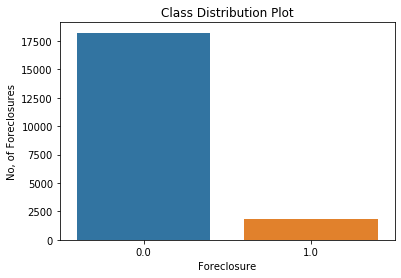

In [13]:
sns.countplot(df2['FORECLOSURE'])
plt.xlabel('Foreclosure')
plt.ylabel('No, of Foreclosures')
plt.title("Class Distribution Plot")
plt.show()

In [27]:
a=pd.DataFrame(df1['FORECLOSURE'].value_counts())
a.columns=['number']
a['percentage']=a['number']/a['number'].sum()
a

,number,percentage
0.0,18217,0.910304
1.0,1795,0.089696


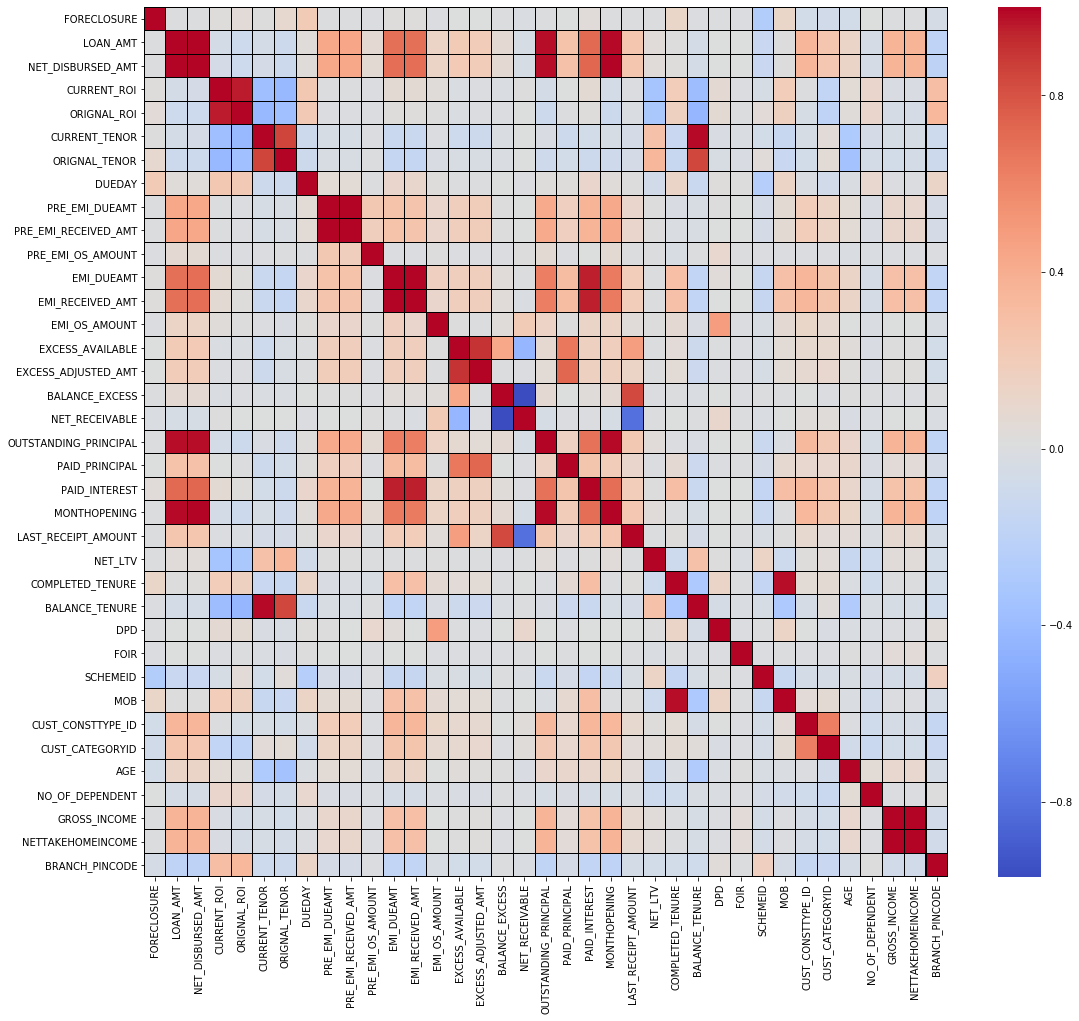

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [11]:
plt.figure(figsize = (18,16))
sns_plot=sns.heatmap(df2.corr(), cmap = 'coolwarm', linecolor = 'black', linewidths = 0.02)
plt.show()
sns_plot.savefig("output.png")

In [12]:
fig = sns_plot.get_figure()
fig.savefig("output.png")

## Univariate analysis

In [109]:
#lets check numeric and categorical columns after correcting the data types.
numeric = df.dropna(how = 'all', axis = 1).dtypes[df.dropna(how = 'all', axis = 1).dtypes != 'object'].index
print(len(numeric))
print(numeric)

Object = df.dropna(how = 'all', axis = 1).dtypes[df.dropna(how = 'all', axis = 1).dtypes == 'object'].index
print(len(Object))
print(Object)

37
Index(['LOAN_AMT', 'NET_DISBURSED_AMT', 'INTEREST_START_DATE', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY',
       'AUTHORIZATIONDATE', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_DATE',
       'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE',
       'DPD', 'FOIR', 'SCHEMEID', 'MOB', 'AGE', 'NO_OF_DEPENDENT',
       'GROSS_INCOME', 'NETTAKEHOMEINCOME', 'BRANCH_PINCODE'],
      dtype='object')
12
Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'CITY', 'PRODUCT',
       'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'CUST_CONSTTYPE_ID',
       'CUST_CATEGORYID', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION'],
      dtype='object')


In [113]:
numeric=numeric.drop(['INTEREST_START_DATE','AUTHORIZATIONDATE','LAST_RECEIPT_DATE'])

In [114]:
Object=Object.drop(['AGREEMENTID','CUSTOMERID'])
#Object=Info[(Info['data_type']=='object') & (Info['Unique_Values']<16)].index

In [119]:
Object=Object.drop(['NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH'])

In [122]:
Object

Index(['FORECLOSURE', 'CITY', 'PRODUCT', 'CUST_CONSTTYPE_ID',
       'CUST_CATEGORYID', 'SEX', 'MARITAL_STATUS', 'QUALIFICATION'],
      dtype='object')

In [120]:
def count_plots(x):
    fig,ax= plt.subplots(len(x.columns),1,figsize=(10,30))
    cols=x.columns
    for i in range(len(cols)):
        sns.countplot(x[cols][i],ax=ax[i])
    plt.tight_layout()
    plt.show()

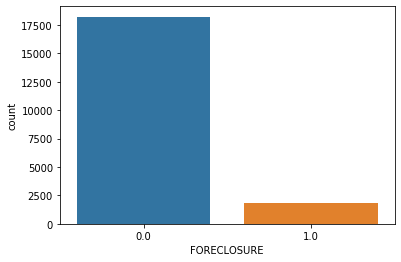

In [123]:
sns.countplot(df['FORECLOSURE'])

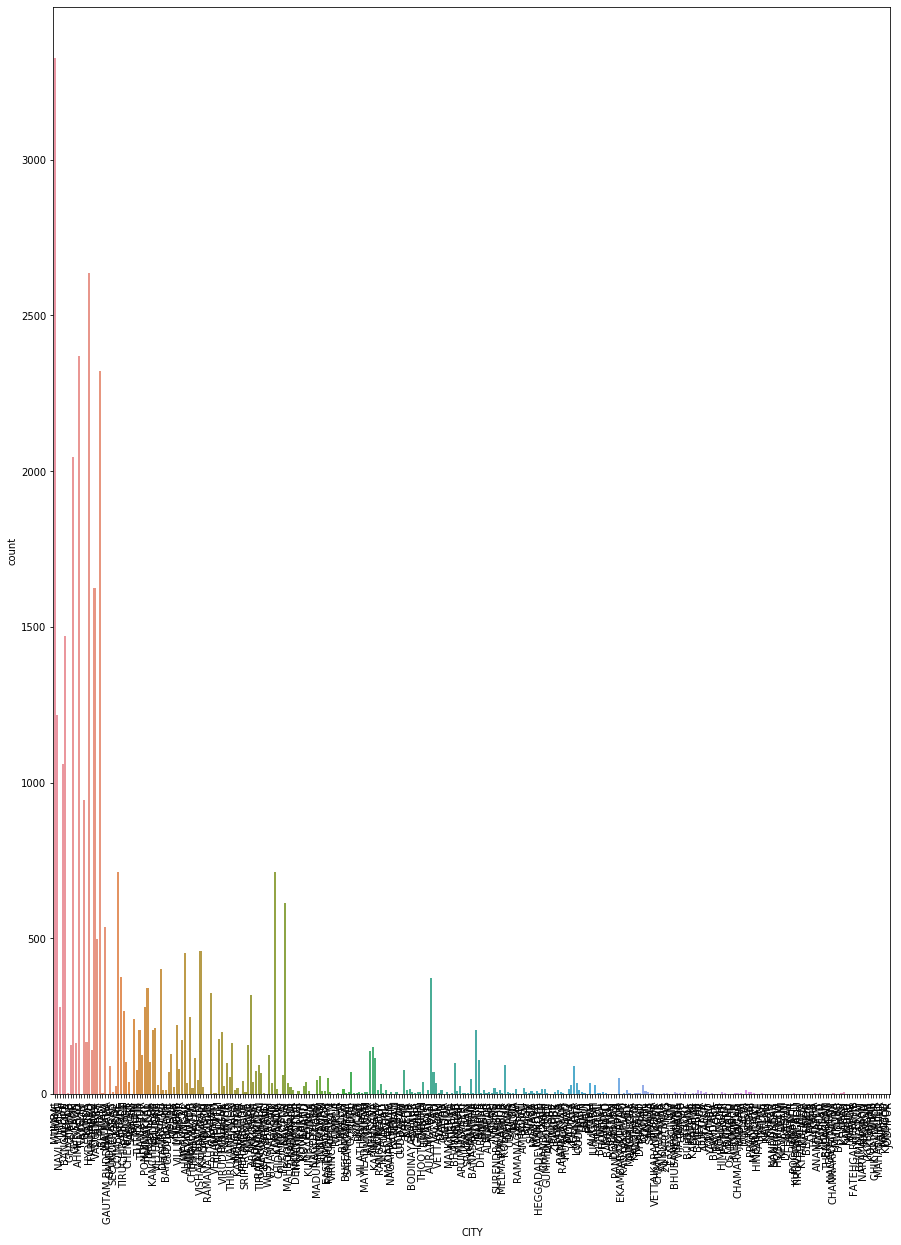

In [129]:

plt.figure(figsize=(15,20))
sns.countplot(df['CITY'])
plt.xticks(rotation=90)
plt.show()


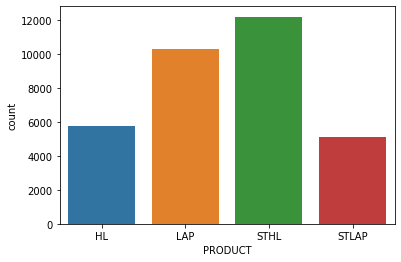

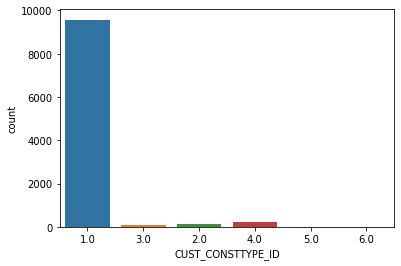

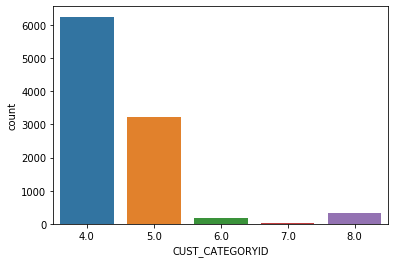

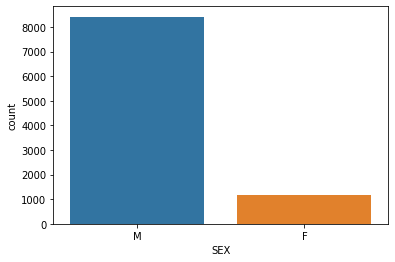

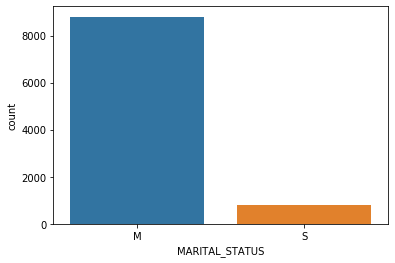

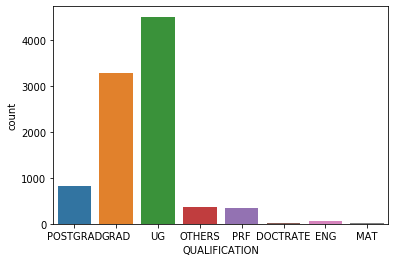

In [130]:
sns.countplot(df['PRODUCT'])
plt.show()
sns.countplot(df['CUST_CONSTTYPE_ID'])
plt.show()
sns.countplot(df['CUST_CATEGORYID'])
plt.show()
sns.countplot(df['SEX'])
plt.show()
sns.countplot(df['MARITAL_STATUS'])
plt.show()
sns.countplot(df['QUALIFICATION'])
plt.show()

In [133]:
## Function to plot box and kde plots of numeric columns
def kde_box_pair(x):
    fig, ax = plt.subplots(len(x.columns), 2, figsize = (16, 140))
    cols = x.columns
    for i in range(2):
        for j in range(len(x.columns)):
            if i == 0:
                sns.kdeplot(x[cols[j]], ax = ax[j][i])
                ax[j][i].axvline(x[cols[j]].mean(), label = 'Mean', color = 'black')
                ax[j][i].axvline(x[cols[j]].median(), label = 'Median', color = 'red')
                ax[j][i].legend()
            else:
                sns.boxplot(x[cols[j]], ax = ax[j][i], showmeans = True)
    
    plt.tight_layout()
    plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


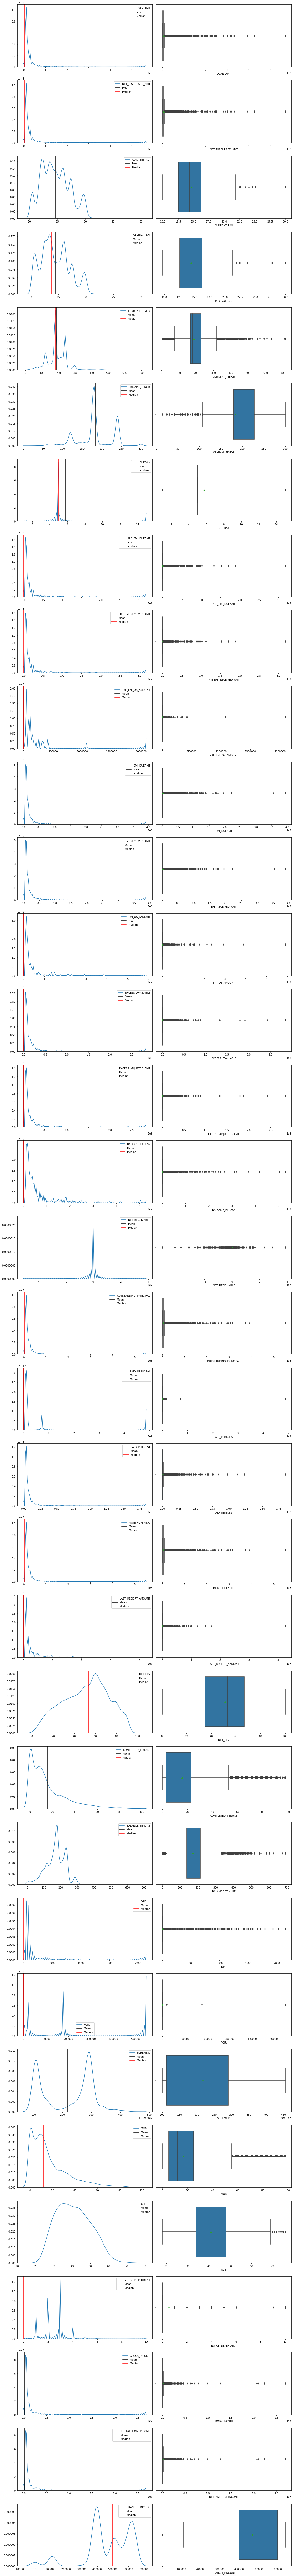

In [134]:
kde_box_pair(df[numeric])

In [138]:
## Bivariate Analysis

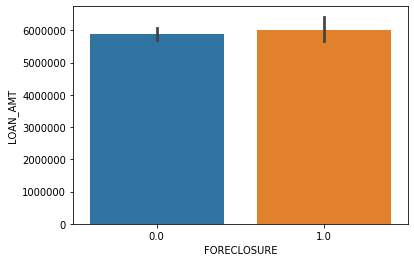

In [139]:
sns.barplot(x='FORECLOSURE',y='LOAN_AMT',data=df)
plt.show()

In [140]:
df.groupby(by='FORECLOSURE')['LOAN_AMT'].max().reset_index()

,FORECLOSURE,LOAN_AMT
0,0.0,4.245665e+08
1,1.0,1.077647e+08


In [141]:
df.groupby(by='FORECLOSURE')['LOAN_AMT'].sum().reset_index()

,FORECLOSURE,LOAN_AMT
0,0.0,1.072364e+11
1,1.0,1.079172e+10


In [142]:
df.groupby(by='FORECLOSURE')['LOAN_AMT'].count().reset_index()

,FORECLOSURE,LOAN_AMT
0,0.0,18217
1,1.0,1795


In [143]:
df.groupby(by='FORECLOSURE')['LOAN_AMT'].min().reset_index()

,FORECLOSURE,LOAN_AMT
0,0.0,76467.000277
1,1.0,37532.395000


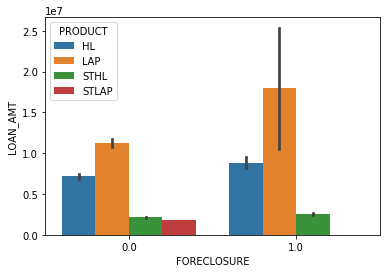

In [144]:
sns.barplot(x='FORECLOSURE',y='LOAN_AMT',data=df,hue='PRODUCT')
plt.show()

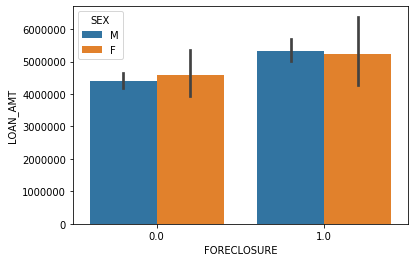

In [146]:
sns.barplot(x='FORECLOSURE',y='LOAN_AMT',data=df,hue='SEX')
plt.show()

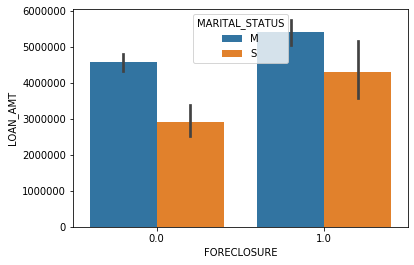

In [147]:
sns.barplot(x='FORECLOSURE',y='LOAN_AMT',data=df,hue='MARITAL_STATUS')
plt.show()

In [3]:
df1=pd.read_csv('final_data.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (36,37,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1.head()

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,11220001,1.0,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,45.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.614898e+06,8.439420e+06,175477.782641,2.135869e+05,2.135869e+05,0.0,175477.782641,1.164472e+05,1.159366e+07,2.725723e+06,8.693575e+06,2014-05-05,1000000.0,40.06,45,0.0,0.0,0.60,HL,10901100.0,NaN,NaN,45,1.0,5.0,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,11220002,1.0,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000e+00,0.000000e+00,0.0,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.60,HL,10901100.0,NaN,NaN,38,1.0,5.0,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,11220006,1.0,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,15.606900,11.549106,312.0,180,5,2010-11-02,MUMBAI,5947.630536,5947.630536,0.0,4.670211e+06,4.670211e+06,0.000000,1.179716e+06,1.179716e+06,0.0,0.000000,2.994184e+06,9.392115e+05,2.990124e+06,3.744831e+06,2017-08-05,22878.0,50.89,81,231.0,0.0,0.72,HL,10901101.0,NaN,NaN,81,3.0,4.0,NaN,43.0,M,M,GRAD,0.0,NaN,NaN,53536.208228,NaN,53536.208228,400070.0
3,11220008,1.0,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,11.236968,10.612692,91.0,180,1,2010-10-06,THANE,60322.180776,60322.180776,0.0,1.313098e+07,1.306732e+07,63659.280762,6.770848e+06,6.770848e+06,0.0,63659.280762,4.295120e+04,9.979637e+06,4.648994e+06,5.747875e+06,2018-05-02,65741.0,84.63,91,0.0,0.0,0.60,HL,10901100.0,0,0,91,1.0,5.0,NaN,33.0,M,M,POSTGRAD,0.0,NaN,AVP,123370.483661,7.0,123370.483661,400070.0
4,11220010,1.0,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,14.982624,10.924830,304.0,180,5,2010-10-26,MUMBAI,27732.787464,27732.787464,0.0,1.048923e+07,1.048923e+07,0.000000,1.202181e+05,1.202181e+05,0.0,0.000000,7.200653e+06,5.552847e+05,6.593778e+06,7.200653e+06,2018-04-05,54433.0,30.94,89,215.0,0.0,0.83,HL,10901101.0,0,0,90,3.0,4.0,NaN,37.0,M,M,UG,0.0,NaN,NaN,93803.844072,NaN,93803.839568,400070.0


In [7]:
missing_values(df1)

,values,percentage
PROFESSION,33354,100.000000
OCCUPATION,33354,100.000000
POSITION,32693,98.018229
PRE_JOBYEARS,30979,92.879415
QUALIFICATION,23957,71.826468
MARITAL_STATUS,23750,71.205852
AGE,23750,71.205852
SEX,23748,71.199856
NO_OF_DEPENDENT,23433,70.255442
BRANCH_PINCODE,23427,70.237453


In [8]:
#
df1.drop(['PROFESSION','OCCUPATION','POSITION','PRE_JOBYEARS'],axis=1,inplace=True)

In [9]:
Info = pd.DataFrame({
    'Unique_Values' : df1.nunique(),
    'data_type' : df1.dtypes,
    'isNull' : df1.isnull().sum(),
    '%of_null_value':((df1.isnull().sum())/(df1.isnull().count()))*100
})
Info.sort_values(by=['isNull'],ascending=False)

,Unique_Values,data_type,isNull,%of_null_value
QUALIFICATION,8,object,23957,71.826468
MARITAL_STATUS,2,object,23750,71.205852
AGE,59,float64,23750,71.205852
SEX,2,object,23748,71.199856
NO_OF_DEPENDENT,9,float64,23433,70.255442
BRANCH_PINCODE,49,float64,23427,70.237453
NETTAKEHOMEINCOME,7036,float64,23354,70.018588
GROSS_INCOME,7073,float64,23354,70.018588
CUST_CATEGORYID,5,float64,23354,70.018588
CUST_CONSTTYPE_ID,6,float64,23354,70.018588


In [10]:
# 1. Creating %_OF_LOAN_PAID as (PAID_PRINCIPAL / LOAN_AMT) * 100 
df1['%_OF_LOAN_PAID'] = (df1['PAID_PRINCIPAL'] / df1['NET_DISBURSED_AMT']) * 100

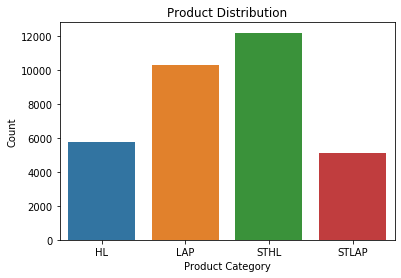

In [29]:
sns.countplot(df1['PRODUCT'])
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Distribution')
plt.show()


In [32]:
Info = pd.DataFrame({
    'skewness': df1.skew(),
    'Kurtosis': df1.kurt()})

In [33]:
Info.sort_values(by=['skewness'],ascending=False)

,skewness,Kurtosis
FOIR,1.625682e+02,27635.285133
PAID_PRINCIPAL,1.107208e+02,15923.744898
PRE_EMI_OS_AMOUNT,9.469658e+01,10748.336018
EMI_OS_AMOUNT,5.445530e+01,3977.281540
EXCESS_ADJUSTED_AMT,5.141989e+01,3859.274443
EXCESS_AVAILABLE,4.062599e+01,2587.296168
BALANCE_EXCESS,3.932217e+01,1925.099668
LAST_RECEIPT_AMOUNT,3.454007e+01,1572.764811
NETTAKEHOMEINCOME,2.781992e+01,1035.887909
GROSS_INCOME,2.776723e+01,1033.071886
